# Functions 

Reference: <br>
    University of College London Python lecture note <br>
    MIT Python lecture note <br>
    Scipy lecture notes (http://scipy-lectures.org/index.html)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Functions
- abs( ) is an example of a function.
- Functions have a name (here “abs”), followed by parentheses. They can take some input (here a number), do something with them and create some output (here it returns the absolute value of the number). <br>
 - Their name should usually be self-explanatory.  <br>
 - ut you can type help(abs) or abs? to see what any function does exactly.  <br>
- They form the fundamental basis of any imperative programming language. <br>
 - Just think of them as providing you with advanced functionalities for free for now.  <br>
 - We will cover more about functions later on.
- Functions take an input (arguments) and produce an output (return value).
 - just like mathematical functions.
- Examples of functions:
 - Compute something for a particular input. 
 - Load or save results.
 - Produce a figure or plot.
 
 Note that Python is case-sensitive.
 

Define Functions like this:

In [1]:
def square(x):
    return(x*x)

- def tells Python you are defining a function.
- Next is the name of the function square.
- Then you tell Python about the inputs the function takes, and give them names.
> In our example, square is a function with just one parameter, called x

- Define a Python function that computes the function falues.

In [3]:
def f(x):
    return 2*x**2 +3
print (f(0),f(3))

3 21


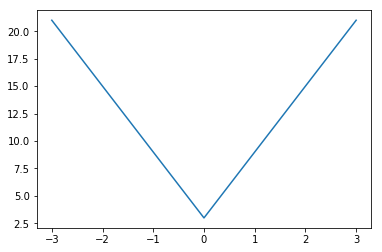

In [8]:
plt.plot([-3,0,3],[f(-3),f(0),f(3)])

#### Exercise
Create a function called cc with input temperature (K), temp, and returns saturation vapor pressure (hPa) es. <br>

> es = 6.11* exp (17.502*T/(T+240.97)) <br>

Note that T in the above equation is in Celcius. Also note that you have to numpy to calculate exponential values (np.exp( )).

Calcuate and print saturation vapor pressure at 20$\mathrm{^o}$C.

#### Exercise
Let's Make a plot for the Clausius-Clapeyron relationship.

Create a temperature array Tc from 0 to 30, with an increment of 0.1.

Create an array Ta (absolute temperature), which is Tc+273.15.

Call the function cc using the input Ta and save it as es (es = ...). Note that the input can be an array or a number.

Make a plot (x axis: Tc, Y axis: es) and add axes labels including units.

### Advanced (optional)

Plot latent heat flux for January and July averages.
xarray.open_dataset can open and decode a dataset from a file path or an OpenDAP URL.

In [70]:
import xarray as xr
file1='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2.derived/gaussian_grid/lhtfl.sfc.mon.mean.nc'

In [72]:
with xr.open_dataset(file1) as ds1:
    print(ds1)
    lh=ds1.lhtfl

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 505)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    lhtfl      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           Monthly NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/da

In [74]:
# Calcuate monthly average temperature at each grid.
lh_clim = lh.groupby('time.month').mean(dim='time')
print(lh_clim)

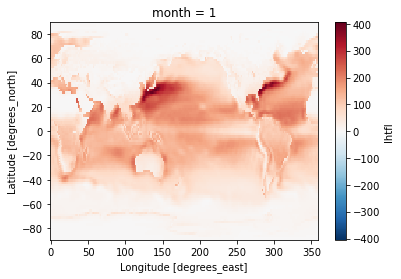

In [80]:
# Make a contour plot for January
lh_clim.isel(month=0).plot()

### Optional exercise
Make a contour plot for July